Market Size: 2
Market Size: 3
Market Size: 4
Market Size: 5
Market Size: 6
Market Size: 7
Market Size: 8
Market Size: 9
Market Size: 10
Market Size: 11
Market Size: 12
Market Size: 13
Market Size: 14
Market Size: 15
Market Size: 16
Market Size: 17
Market Size: 18
Market Size: 19
Market Size: 20
Market Size: 21
Market Size: 22
Market Size: 23
Market Size: 24
Market Size: 25
Market Size: 26
Market Size: 27
Market Size: 28
Market Size: 29
Market Size: 30
Market Size: 31
Market Size: 32
Market Size: 33
Market Size: 34
Market Size: 35
Market Size: 36
Market Size: 37
Market Size: 38
Market Size: 39
Market Size: 40
Market Size: 41
Market Size: 42
Market Size: 43
Market Size: 44
Market Size: 45
Market Size: 46
Market Size: 47
Market Size: 48
Market Size: 49
Market Size: 50
Market Size: 51
Market Size: 52
Market Size: 53
Market Size: 54
Market Size: 55
Market Size: 56
Market Size: 57
Market Size: 58
Market Size: 59
Market Size: 60
Market Size: 61
Market Size: 62
Market Size: 63
Market Size: 64


/Users/justin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:165: RuntimeWarning: divide by zero encountered in log
/Users/justin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in log
/Users/justin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars


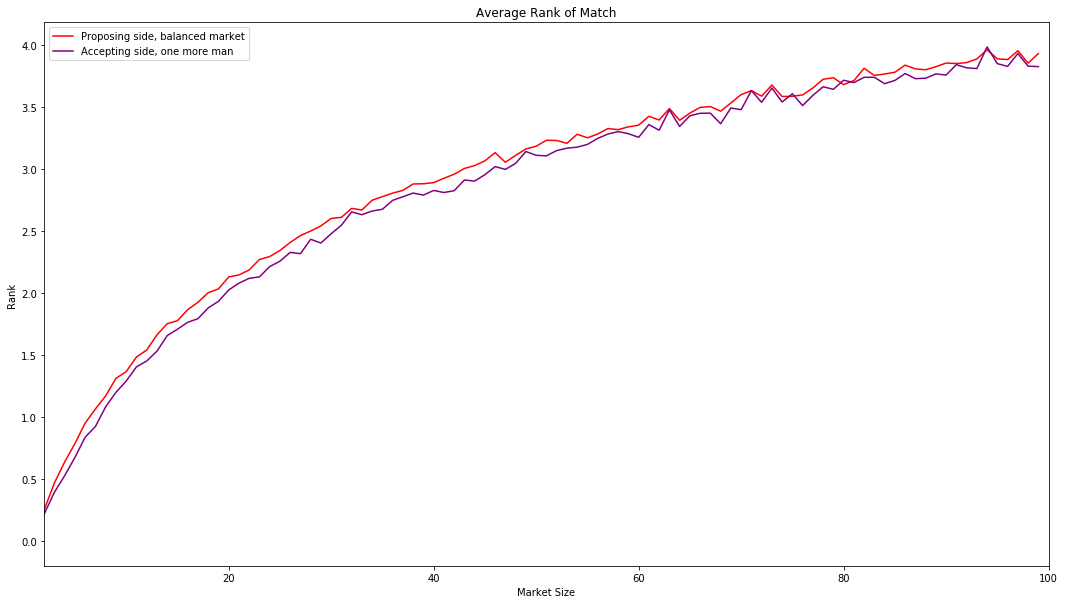

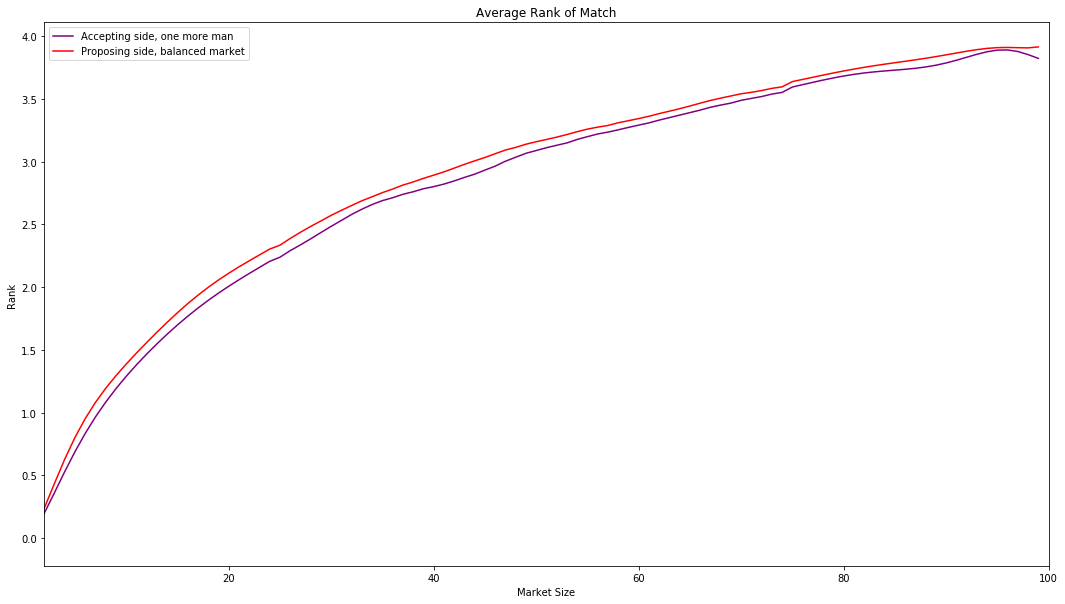

In [20]:
import random
import copy
from pandas import *
from matplotlib import pyplot as plt
from operator import itemgetter
import numpy as np
import operator
import time
from scipy.interpolate import make_interp_spline, BSpline
from scipy.signal import savgol_filter



def deferred_acceptance(proposing, accepting, truncation=0):
    acc = np.argsort(accepting, axis=1)
    prop = np.argsort(proposing, axis=1)
    
    offers = [[] for woman in range(len(acc))] # women-indexed offers
    matches = [-1 for woman in range(len(acc))] # women-indexed matches
    unmatched = [i for i in range(len(prop))] # list of men who are unmatched
    offered = [] # list of women who are offered men
    
    while unmatched:
        
        for man in unmatched:
            for idx, woman in reversed(list(enumerate(prop[man]))):
                if woman != -1:
                    offers[woman].append(man)
                    prop[man][idx] = -1
                    if woman not in offered:
                        offered.append(woman)
                    break
        
        unmatched = []
            
        for woman in offered:
            current_man = matches[woman]
            for man in reversed(acc[woman]):
                if man == current_man:
                    break
                if man in offers[woman]:
                    if current_man != -1:
                        unmatched.append(current_man)
                    matches[woman] = man
                    break
            for man in offers[woman]:
                best_man = matches[woman]
                if man != best_man and man != current_man:
                    unmatched.append(man)
                    
        offers = [[] for woman in range(len(acc))] # women-indexed offers
        offered = []
            
    return matches

def average_rank(matches, proposing, accepting):
    
    acc_rank = 0
    prop_rank = 0
    
    for woman, man in enumerate(matches):
        acc_rank += ((accepting[woman][man] + 1) / len(matches))
        prop_rank += ((proposing[man][woman] + 1) / len(matches))

    return (len(proposing) -acc_rank ), (len(proposing) - prop_rank)

def add_man(men_values, women_values):
    
    women = len(men_values[0])
    men = len(men_values)
    men_values.append(random.sample(range(0, women), women))
    
    for row in women_values:
        row.append(round(random.uniform(0,1) * (men)))
    
    for i in range(women):
        for j in range(men):
            if women_values[i][j] >= women_values[i][-1]:
                women_values[i][j] += 1
        
    return men_values, women_values

def main():

    max_size = 100
    max_iters = 500
    min_size = 2
    
    # RANKS
    accepting_rank_balanced = [0 for i in range(max_size)]
    proposing_rank_balanced = [0 for i in range(max_size)]
    
    accepting_rank_oneMoreProposer = [0 for i in range(max_size)]
    proposing_rank_oneMoreProposer = [0 for i in range(max_size)]
    accepting_rank_oneMoreAccepter = [0 for i in range(max_size)]
    proposing_rank_oneMoreAccepter = [0 for i in range(max_size)]
    
    
    # CORES
    women_core = [0 for i in range(max_size)]
    men_core = [0 for i in range(max_size)]
    
    women_core1 = [0 for i in range(max_size)]
    men_core1 = [0 for i in range(max_size)]
    
    for n in range(2, max_size):      
        print(f'Market Size: {n}')
        for iters in range(max_iters):
            men_values = [random.sample(range(0, n), n) for woman in range(n)]
            women_values = [random.sample(range(0, n), n) for man in range(n)]
    
            mpda = deferred_acceptance(men_values, women_values)
            wpda = deferred_acceptance(women_values, men_values) 

            B = [-1 for s in range(len(women_values))]  
            for index, element in enumerate(wpda):
                if element != -1:
                    B[element] = index
            wpda = B
            
            wpda_women_rank, wpda_men_rank = average_rank(wpda, men_values, women_values)
            mpda_women_rank, mpda_men_rank = average_rank(mpda, men_values, women_values)
        
            # ADD MAN
            men_values1, women_values1 = add_man(men_values, women_values)
        
            mpda1 = deferred_acceptance(men_values1, women_values1)
            wpda1 = deferred_acceptance(women_values1, men_values1)

            B = [-1 for s in range(len(women_values1))]  
            for index, element in enumerate(wpda1):
                if element != -1:
                    B[element] = index
            wpda1 = B
            
            wpda1_women_rank, wpda1_men_rank = average_rank(wpda1, men_values1, women_values1)
            mpda1_women_rank, mpda1_men_rank = average_rank(mpda1, men_values1, women_values1)
            
            accepting_rank_balanced[n] += (mpda_women_rank + wpda_men_rank) / (2 * max_iters) # might as well use both
            proposing_rank_balanced[n] += (wpda_women_rank + mpda_men_rank) / (2 * max_iters) # might as well use both
            accepting_rank_oneMoreProposer[n] += mpda1_women_rank / max_iters
            proposing_rank_oneMoreProposer[n] += mpda1_men_rank / max_iters
            accepting_rank_oneMoreAccepter[n] += wpda1_men_rank / max_iters
            proposing_rank_oneMoreAccepter[n] += wpda1_women_rank / max_iters
    
            
            women_core[n] += abs((wpda_women_rank - mpda_women_rank) / max_iters)
            men_core[n] += abs((mpda_men_rank - wpda_men_rank) / max_iters)
            
            women_core1[n] += abs((mpda1_women_rank - wpda1_women_rank ) / max_iters)
            men_core1[n] += abs((wpda1_men_rank - mpda1_men_rank ) / max_iters)

#     x = np.arange(len(women_core)) # the x locations for the groups
#     plt.figure(figsize=(18,10))
#     plt.plot(x, '--', np.array(accepting_rank_balanced), label = "Balanced market")
#     plt.plot(x, '--', np.array(accepting_rank_oneMoreProposer), label = "One-more proposer")
#     plt.plot(x, '--', np.array(accepting_rank_oneMoreAccepter), label = "One-more accepter")
#     plt.xlabel('Market Size')
#     plt.ylabel('Rank')
#     plt.title('Average Rank, Accepting Side')
#     plt.xlim(min_size, max_size)
#     plt.legend(loc='best')
#     plt.show()
            
    log_n = [(np.log(n) -1)  for n in range(max_size)]
    n_over_log_n = [(n / np.log(n)) - 1  for n in range(max_size)]
    

    
#     x = np.arange(len(women_core)) # the x locations for the groups
#     plt.figure(figsize=(18,10))
#     plt.plot(x, np.array(accepting_rank_balanced), label = "Member of accepting side")
#     plt.plot(x, np.array(proposing_rank_balanced), label = "Member of proposing side")
#     plt.plot(x, np.array(log_n), label = "log(n) - 1")
#     plt.plot(x, np.array(n_over_log_n), label = "n / log(n) - 1")
#     plt.xlabel('Market Size')
#     plt.ylabel('Rank')
#     plt.title('Average Rank in Balanced Market')
#     plt.xlim(min_size, max_size)
#     plt.legend(loc='best')
#     plt.show()
        
#     x = np.arange(len(women_core)) # the x locations for the groups
#     plt.figure(figsize=(18,10))
#     plt.plot(x, np.array(accepting_rank_balanced), label = "Accepting side, balanced market")
#     plt.plot(x, np.array(proposing_rank_balanced), label = "Proposing side, balanced market", color='red')
#     plt.plot(x, np.array(log_n), label = "log(n) - 1")
#     plt.plot(x, np.array(n_over_log_n), label = "n / log(n) - 1")
#     plt.plot(x, np.array(accepting_rank_oneMoreProposer), label = "Accepting side, one more man", color='purple')
#     plt.plot(x, np.array(proposing_rank_oneMoreProposer), label = "Proposing side, one more man")
#     plt.xlabel('Market Size')
#     plt.ylabel('Rank')
#     plt.title('Average Rank of Match')
#     plt.xlim(min_size, max_size)
#     plt.legend(loc='best')
#     plt.show()
    
    x = np.arange(len(women_core)) # the x locations for the groups
    plt.figure(figsize=(18,10))
    plt.plot(x, np.array(proposing_rank_balanced), label = "Proposing side, balanced market", color='red')
    plt.plot(x, np.array(accepting_rank_oneMoreProposer), label = "Accepting side, one more man", color='purple')
    plt.xlabel('Market Size')
    plt.ylabel('Rank')
    plt.title('Average Rank of Match')
    plt.xlim(min_size, max_size)
    plt.legend(loc='best')
    plt.show()
    
    x = np.arange(len(women_core)) # the x locations for the groups
    plt.figure(figsize=(18,10))
    accepting_rank_oneMoreProposer_smooth = savgol_filter(np.array(accepting_rank_oneMoreProposer), 51, 10)
    proposing_rank_balanced_smooth = savgol_filter(np.array(proposing_rank_balanced), 51, 10)
    plt.plot(x, accepting_rank_oneMoreProposer_smooth, label = "Accepting side, one more man", color='purple')
    plt.plot(x, proposing_rank_balanced_smooth, label = "Proposing side, balanced market", color = 'red')
    plt.xlabel('Market Size')
    plt.ylabel('Rank')
    plt.title('Average Rank of Match')
    plt.xlim(min_size, max_size)
    plt.legend(loc='best')
    plt.show()


#     x = np.arange(len(women_core)) # the x locations for the groups
#     plt.figure(figsize=(18,10))
#     plt.plot(x, np.array(women_core), label = "Balanced market")
#     plt.plot(x, np.array(men_core1), label = "One more on the proposing side")
#     plt.xlabel('Market Size')
#     plt.ylabel('Difference in Rank')
#     plt.title('Difference in rank betweeen best stable match and worst stable match')
#     plt.xlim(min_size, max_size)
#     plt.legend(loc='best')
#     plt.show()
                       
main()